<a href="https://www.kaggle.com/victortrigo/cnn-para-diagnostico-de-neumon-a?scriptVersionId=85403811" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CNN Pneumonia

In [1]:
import tensorflow as tf
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2
import os


# import warnings
# warnings.filterwarnings("ignore")

## ETL

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [4]:
l = np.random.binomial(1, 0.1, 5216)

x_train = []
y_train = []

x_val = []
y_val = []

for i in range(1,5216):
    if l[i] == 0:
            x_train.append(train[i][0])
            y_train.append(train[i][1])
    else:
            x_val.append(train[i][0])
            y_val.append(train[i][1])

In [5]:
x_test = []
y_test = []

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [6]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [7]:
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(x_val.shape[0], img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)
y_test = np.array(y_test)

In [8]:
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=2, dtype='float32'
)

y_val = tf.keras.utils.to_categorical(
    y_val, num_classes=2, dtype='float32'
)

y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=2, dtype='float32'
)

In [9]:
print('train data image: ', x_train.shape)
print('test data image: ', x_test.shape)
print('val data image: ', x_val.shape)

train data image:  (4709, 150, 150, 1)
test data image:  (624, 150, 150, 1)
val data image:  (506, 150, 150, 1)


In [10]:
print('train data image: ', y_train.shape)
print('test data image: ', y_test.shape)
print('val data image: ', y_val.shape)

train data image:  (4709, 2)
test data image:  (624, 2)
val data image:  (506, 2)


## Data Viz

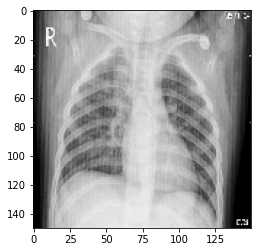

In [11]:
plt.imshow(x_train[0], cmap='gray')

## Model

In [12]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True
)

In [13]:
checkpoint = ModelCheckpoint('mejor_modelo.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)

In [14]:
# model = Sequential()

# ## conv 1
# model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

# ## conv 2
# model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# ## conv 3
# model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# ## conv 4
# model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# ## conv 5
# model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

# ## conv 6
# model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# ## Clasificacion - Flatten
# model.add(Flatten())
# model.add(Dense(2, activation='softmax'))

# model.summary()

In [15]:
base_filtros = 32
w_regularizers = 1e-5

In [16]:
model = Sequential()

model.add(Conv2D(base_filtros,   (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

2022-01-16 22:09:31.558059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 22:09:31.680941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 22:09:31.682068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 22:09:31.684172: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0

 SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 22:09:34.020186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15403 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy']
)

In [18]:
hist = model.fit(datagen.flow(x_train, y_train),
                 callbacks=[checkpoint],
                 steps_per_epoch=40,
                 epochs=100,
                 verbose=2,
                 validation_data=(datagen.flow(x_val, y_val))
)

2022-01-16 22:09:35.240483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-01-16 22:09:37.030113: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


40/40 - 11s - loss: 7.1992 - accuracy: 0.7852 - val_loss: 1.4896 - val_accuracy: 0.7668

Epoch 00001: val_accuracy improved from -inf to 0.76680, saving model to mejor_modelo.hdf5
Epoch 2/100
40/40 - 3s - loss: 3.6465 - accuracy: 0.8719 - val_loss: 3.7684 - val_accuracy: 0.4111

Epoch 00002: val_accuracy did not improve from 0.76680
Epoch 3/100
40/40 - 3s - loss: 2.7962 - accuracy: 0.8795 - val_loss: 12.7026 - val_accuracy: 0.2431

Epoch 00003: val_accuracy did not improve from 0.76680
Epoch 4/100
40/40 - 4s - loss: 3.6874 - accuracy: 0.8828 - val_loss: 11.2607 - val_accuracy: 0.2549

Epoch 00004: val_accuracy did not improve from 0.76680
Epoch 5/100
40/40 - 3s - loss: 3.4059 - accuracy: 0.8867 - val_loss: 9.8131 - val_accuracy: 0.2688

Epoch 00005: val_accuracy did not improve from 0.76680
Epoch 6/100
40/40 - 3s - loss: 3.4788 - accuracy: 0.8797 - val_loss: 14.5870 - val_accuracy: 0.2569

Epoch 00006: val_accuracy did not improve from 0.76680
Epoch 7/100
40/40 - 3s - loss: 4.1458 - ac

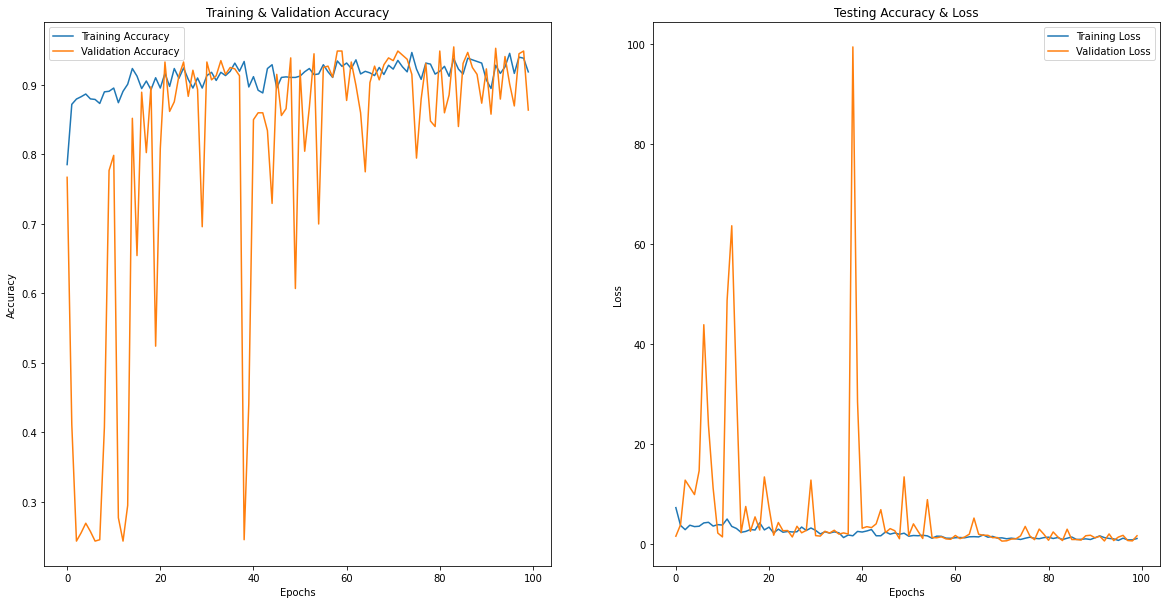

In [19]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].plot(epochs, hist.history['accuracy'],     label='Training Accuracy')
ax[0].plot(epochs, hist.history['val_accuracy'], label= 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, hist.history['loss'],     label = 'Training Loss')
ax[1].plot(epochs, hist.history['val_loss'], label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [20]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 11ms/step - loss: 2.3048 - accuracy: 0.8365
Loss of the model is -  2.3048255443573
20/20 [==============================] - 0s 8ms/step - loss: 2.3048 - accuracy: 0.8365
Accuracy of the model is -  83.65384340286255 %


In [21]:
model2 = load_model('./mejor_modelo.hdf5')

In [22]:
print("Loss of the model is - " , model2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model2.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 9ms/step - loss: 4.8590 - accuracy: 0.7788
Loss of the model is -  4.858981132507324
20/20 [==============================] - 0s 8ms/step - loss: 4.8590 - accuracy: 0.7788
Accuracy of the model is -  77.88461446762085 %
